# Kaggle1 for Citizant

I've started a notebook to see how we can solve this. There are comments around several steps to clarify.

First here we import some of the necessary libraries and tell Jupyter we want graphs on the page.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

%matplotlib inline

This will import the data and show the head.

In [2]:
house = pd.read_csv("train.csv")
house.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


The next three commands tell us a little overall information about house.

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
house.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [6]:
house_lim = house[['Neighborhood', 'SalePrice']]

In [16]:
house_lim.groupby('Neighborhood').mean()

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [ ]:
house.boxplot(column=)

I was curious about age and lot area's effects on price. You can see some of the verical anomalies on the YearBuilt.

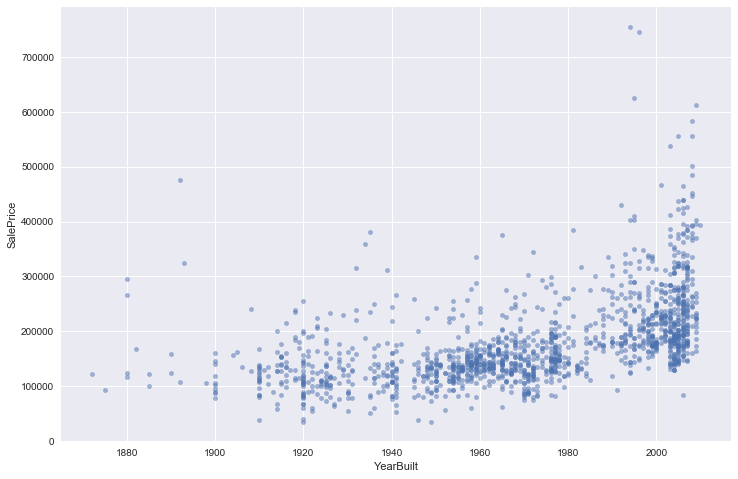

In [6]:
house.plot(x='YearBuilt', y='SalePrice', kind='scatter', alpha=0.5, figsize=(12, 8))

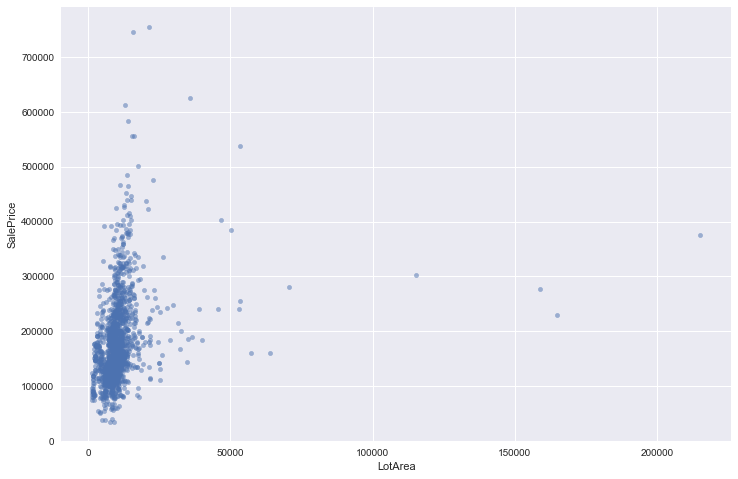

In [7]:
house.plot(x='LotArea', y='SalePrice', kind='scatter', alpha=0.5, figsize=(12, 8))

I wanted to see how scale from sci-kitlearn would work on a feature with high variance, so I checked it on price.

In [8]:
from sklearn.preprocessing import scale
scaledprice = scale(house.SalePrice)
print(scaledprice.var(), scaledprice.mean())

0.9999999999999997 1.3626846987180004e-16


F:\Users\seapea\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


get_dummies will perform what is called 'one-hot encoding' on the information. This removes categories from the dataframe and replaces them with sparse values, zeroes and ones. You will notice though that the dataframe expands significantly.

In [9]:
hothouse = pd.get_dummies(house)
hothouse.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


Machine learning algorithms almost never can handle missing values unless told specifically how to do so. (I don't know anything about this yet.) We have to find a way to handle some missing information beforehand. In numpy, I believe this is frequently called NaN, or not a number. We will find the shorter lists and find a way to fill in or remove them so we can proceed.

I'm also poking around the data to find any strange behavior next.

In [10]:
for i, val in enumerate(house.count(axis=0)):
    if val != len(house):
        print(i, house.columns[i], val)

3 LotFrontage 1201
6 Alley 91
25 MasVnrType 1452
26 MasVnrArea 1452
30 BsmtQual 1423
31 BsmtCond 1423
32 BsmtExposure 1422
33 BsmtFinType1 1423
35 BsmtFinType2 1422
42 Electrical 1459
57 FireplaceQu 770
58 GarageType 1379
59 GarageYrBlt 1379
60 GarageFinish 1379
63 GarageQual 1379
64 GarageCond 1379
72 PoolQC 7
73 Fence 281
74 MiscFeature 54


In [11]:
for i, val in enumerate(hothouse.count(axis=0)):
    if val != len(hothouse):
        print(i, hothouse.columns[i], val)

2 LotFrontage 1201
8 MasVnrArea 1452
25 GarageYrBlt 1379


In [12]:
for num in [2, 8, 25]:
    print(hothouse.columns[num], hothouse.iloc[:, num].var())

LotFrontage 589.7491687482642
MasVnrArea 32784.971167885175
GarageYrBlt 609.5825091487371


In [13]:
for val in range(len(house)):
    if house.MasVnrType.loc[val] == "None":
        if house.MasVnrArea.loc[val] != 0.0:
            print(val, house.MasVnrArea.loc[val], "\n")
#             print(house.iloc[val], "\n")

624 288.0 

773 1.0 

1230 1.0 

1300 344.0 

1334 312.0 

